# Solution for SpaceShip-Titanic Comp
@ Author: Abdelrahman Hanafy <br>
@ Date: Mon, June 27

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Data Explore

In [2]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
out_sample = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")


In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train_df.info()
print("-"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colu

In [7]:
print(train_df.isna().sum())
print("-"*40)
print(test_df.isna().sum())


HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64
----------------------------------------
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------------------------------------
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
----------------------------------------


In [8]:
train_df.describe(include=np.number)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
train_df.describe(include='O')

,HomePlanet,CryoSleep,Cabin,Destination,VIP
count,12682,12660,12671,12696,12674
unique,3,2,9825,3,2
top,Earth,False,G/734/S,TRAPPIST-1e,False
freq,6865,8079,8,8871,12401


In [10]:
RoomService = pd.cut(train_df.RoomService, 3)
RoomService.value_counts()

(-14.327, 4775.667]     12667
(4775.667, 9551.333]       37
(9551.333, 14327.0]         3
Name: RoomService, dtype: int64

# Wranggling

In [11]:
AgeRanges = pd.cut(train_df.Age,bins=[0,5,18,40,65,90],labels=["Chlid","Teen","Adult","Middle","old"])
AgeRanges

0        Adult
1        Adult
2       Middle
3        Adult
4         Teen
         ...  
8688    Middle
8689      Teen
8690     Adult
8691     Adult
8692    Middle
Name: Age, Length: 8693, dtype: category
Categories (5, object): ['Chlid' < 'Teen' < 'Adult' < 'Middle' < 'old']

In [12]:
train_df["AgeRange"] = AgeRanges
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeRange
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Adult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Middle
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Teen


In [13]:
train_df["Extra"] = train_df.RoomService+train_df.FoodCourt+train_df.ShoppingMall+\
                    train_df.Spa+train_df.VRDeck

In [14]:
cabin_df = pd.DataFrame()
cabin_df[["deck","num","side"]]=train_df.Cabin.str.split("/",expand=True)
cabin_df.head()

,deck,num,side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [15]:
cabin_df.describe()

,deck,num,side
count,8494,8494,8494
unique,8,1817,2
top,F,82,S
freq,2794,28,4288


In [16]:
train_df = pd.concat([train_df, cabin_df.reset_index(drop=True)], axis=1)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeRange,Extra,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Adult,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Adult,736.0,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Middle,10383.0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Adult,5176.0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Teen,1091.0,F,1,S


# EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


<AxesSubplot:xlabel='Transported', ylabel='count'>

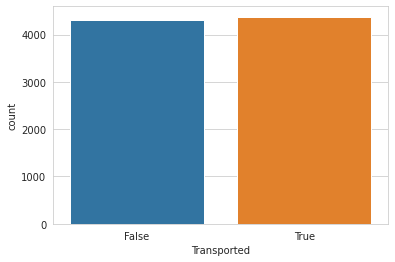

In [18]:
sns.countplot(data=train_df,x="Transported")

<AxesSubplot:xlabel='Age'>

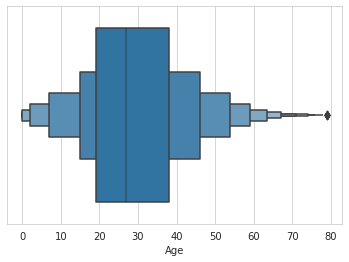

In [19]:
sns.boxenplot(data=train_df,x="Age")

<AxesSubplot:>

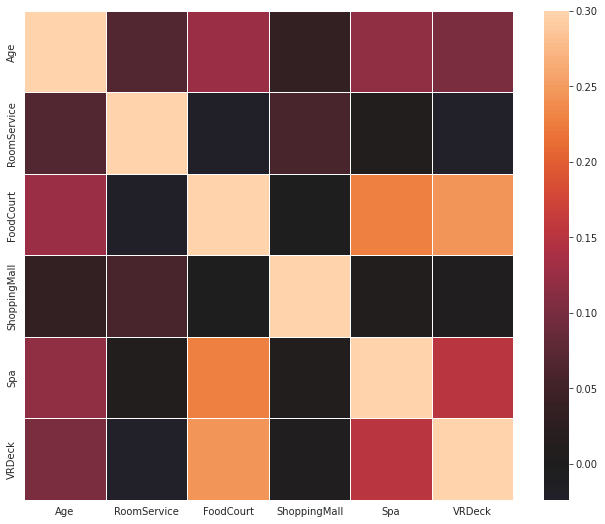

In [20]:
# Compute the correlation matrix
corr = train_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5)

<AxesSubplot:ylabel='Destination'>

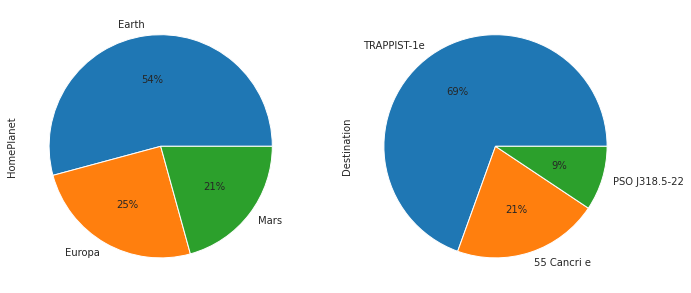

In [21]:
f, axs = plt.subplots(1,2,figsize=(11, 9))
train_df.HomePlanet.value_counts().plot.pie(autopct='%.0f%%',ax = axs[0])
train_df.Destination.value_counts().plot.pie(autopct='%.0f%%',ax = axs[1])

<AxesSubplot:xlabel='Destination', ylabel='count'>

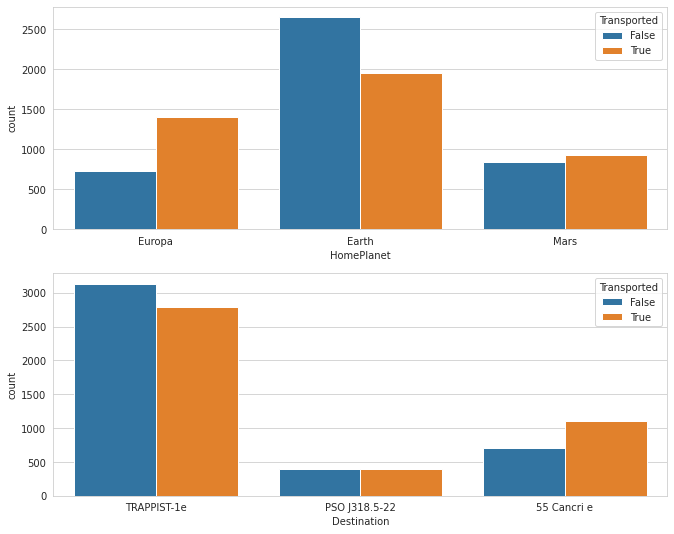

In [22]:
f, axs = plt.subplots(2,1,figsize=(11, 9))
sns.countplot(data=train_df,x="HomePlanet",hue="Transported",ax=axs[0])
sns.countplot(data=train_df,x="Destination",hue="Transported",ax=axs[1])

<AxesSubplot:xlabel='Extra', ylabel='Age'>

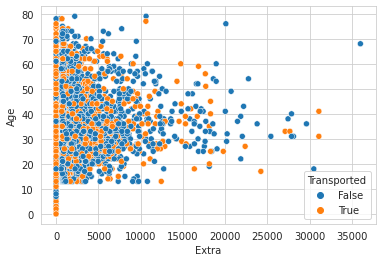

In [23]:
sns.scatterplot(data=train_df,x="Extra",y="Age",hue="Transported")

<AxesSubplot:xlabel='side', ylabel='count'>

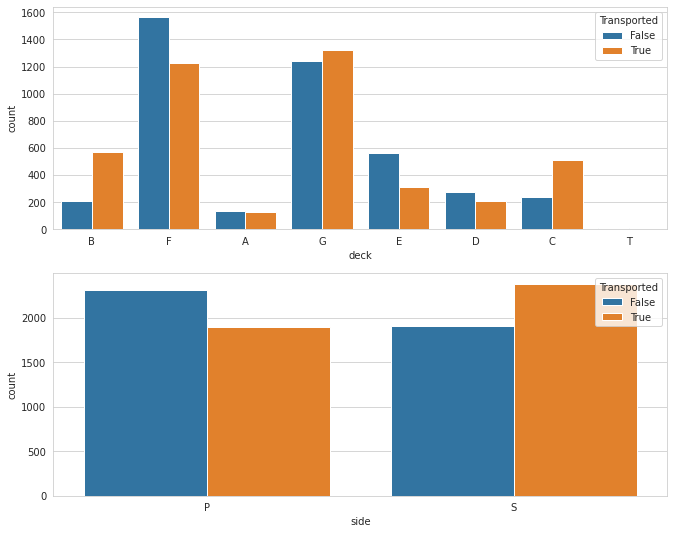

In [24]:
f, axs = plt.subplots(2,1,figsize=(11, 9))
sns.countplot(data=train_df,x="deck",hue="Transported",ax=axs[0])
sns.countplot(data=train_df,x="side",hue="Transported",ax=axs[1])

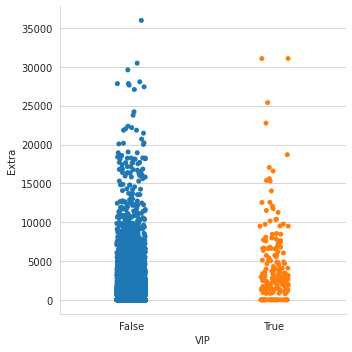

In [25]:
sns.catplot(x="VIP", y="Extra", data=train_df)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

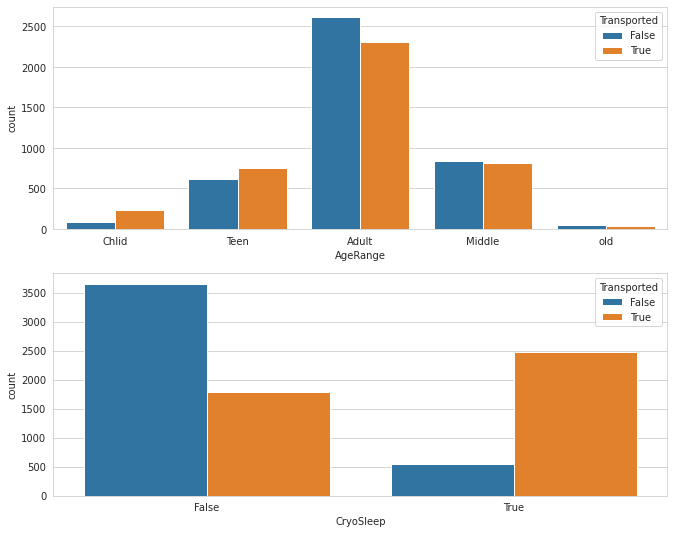

In [26]:
f, axs = plt.subplots(2,1,figsize=(11, 9))
sns.countplot(data=train_df,x="AgeRange",hue="Transported",ax=axs[0])
sns.countplot(data=train_df,x="CryoSleep",hue="Transported",ax=axs[1])

# ML models

#### Notes about Features
- Appered to influnce the target
    - CryoSleep
    - HomePlanet
    - deck & side of the cabin
    - Destination 

In [49]:
#importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [28]:
y = train_df["Transported"]
features = ["CryoSleep","HomePlanet",'deck','side','Destination']
X = pd.get_dummies(train_df[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

(0, 0, 0)

// I should handel missing data in another way

In [29]:
# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

np.isnan(X_train).sum(),np.isnan(X_test).sum()

(0, 0)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

def matrix_it(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    print(model.score(X_train,y_train))
    print(model.score(X_test, y_test))
    pred_ = model.predict(X_test)
    #creating confusion matrix to know the errors
    conf = confusion_matrix(y_test, pred_ ,normalize="all")
    disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)
    

## Suport Vector

0.7337014879582758
0.7253909843606255


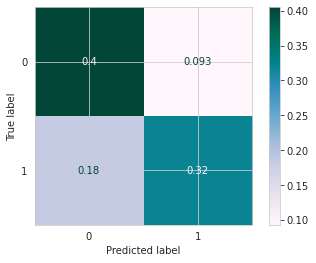

In [52]:
svc = SVC()
matrix_it(svc,X_train, X_test, y_train, y_test)

## Random Forest

0.7347752722810247
0.7272309107635695


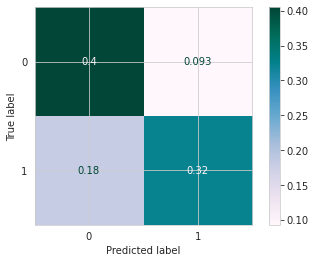

In [31]:
rf = RandomForestClassifier(n_estimators=250, max_depth=7, random_state=1)
matrix_it(rf,X_train, X_test, y_train, y_test)

## Logistic Regression

0.7232704402515723
0.7198712051517939


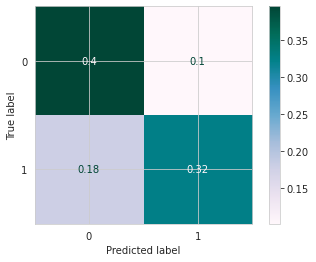

In [50]:
lr = LogisticRegression(random_state=42, C=10)
matrix_it(lr,X_train, X_test, y_train, y_test)

# OUTPUT

In [39]:
out_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [32]:
cabin_test_df = pd.DataFrame()
cabin_test_df[["deck","num","side"]]=test_df.Cabin.str.split("/",expand=True)
test_df = pd.concat([test_df, cabin_test_df.reset_index(drop=True)], axis=1)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
 13  deck          4177 non-null   object 
 14  num           4177 non-null   object 
 15  side          4177 non-null   object 
dtypes: float64(6), object(10)
memory usage: 534.8+ KB


In [43]:
X_out = pd.get_dummies(test_df[features])
X_out = imp.transform(X_out)

len(X_out)

4277

In [44]:
pred_ = rf.predict(X_out)
len(pred_)

4277

In [45]:
out_sample["Transported"] = pred_

In [47]:
out_sample.to_csv("submission_RandomForst_v1.csv",index=False)